In [5]:
import numpy as np
import matplotlib.pyplot as plt
import struct

In [6]:
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [7]:
data = read_idx('./data/train-images.idx3-ubyte')

In [8]:
train_labels = read_idx('./data/train-labels.idx1-ubyte')

In [9]:
data = data.reshape(60000, 28*28)

In [10]:
train_labels[55]

8

In [11]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [344]:
class Layer:
    def __init__(self, input_size, size, activation_function, activation_prime, W=None, b=None, init=None):
        self.size = size
        if W == None:
            if init == None:
                self.W = np.random.normal(0, 0.01, (size, input_size))
        else:
            self.W = W
        self.b = np.zeros(size)
        self.error = np.zeros(self.W.shape)
        self.func = activation_function
        self.func_prime = activation_prime
        
    def predict(self, a):
        self.z = self.b + self.W.dot(a)
        self.a = self.func(self.z)
        return self.a
    
    def backprop(self, learning_rate, W=None, error=None, loss=[]):
        if len(loss) == 0:
            self.error = W.transpose().dot(error) * self.func_prime(self.z)
        else:
            self.error = loss * self.func_prime(self.z)
        self.W += learning_rate * np.dot(self.error, self.a.transpose())
        self.b += self.error

In [345]:
class MLP:
    def __init__(self, input_size, output_size, *layers, learning_rate = 0.001, batch_size = 100):
        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        self.hidden_layers = layers
        self.output_layer = Layer(self.hidden_layers[-1].size, self.output_size, np.tanh, lambda x:1-np.tanh(x)**2)
        self.layers = self.hidden_layers + (self.output_layer,)
        self.learning_rate = learning_rate
        self.batch_size = batch_size
    
    def predict(self, a):
        for f in self.layers:
            a = f.predict(a)
        return softmax(a)
    
    def loss(self, x, y):
        return -(y * np.log(self.predict(x))).sum()
    
    def delta_loss(self, x, y):
        return self.predict(x) - y
    
    def train(self, x, y):
        self.output_layer.backprop(self.learning_rate, loss=self.delta_loss(x, y))
        W = self.output_layer.W
        error = self.output_layer.error
        for l in reversed(range(len(self.hidden_layers))):
            self.hidden_layers[l].backprop(self.learning_rate, W, error)
            W = self.hidden_layers[l].W
            error = self.hidden_layers[l].error

In [346]:
hl = Layer(28*28, 28*28, np.tanh, lambda x:1-np.tanh(x)**2)

In [347]:
mlp = MLP(28*28, 10, hl)

In [354]:
mlp.predict(data[55])

array([0.09760979, 0.11973525, 0.10874453, 0.13325922, 0.08194906,
       0.10452746, 0.12008597, 0.05998983, 0.04649579, 0.1276031 ])

<Container object of 10 artists>

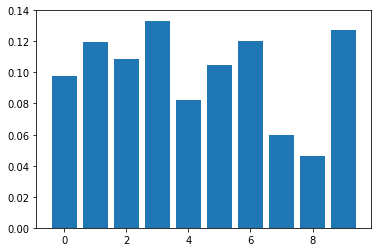

In [355]:
plt.bar(range(10), mlp.predict(data[55]))

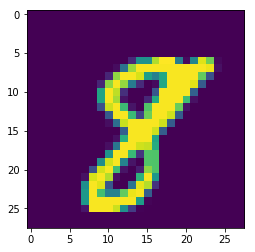

In [356]:
plt.imshow(data[55].reshape((28,28)))

In [357]:
y = np.array([0,0,0,0,0,0,0,0,1,0])

In [358]:
mlp.train(data[48], y)

In [359]:
f = lambda x:1

In [360]:
f(1)

1

In [361]:
None[0]

TypeError: 'NoneType' object is not subscriptable